In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from matplotlib.colors import LinearSegmentedColormap

$S_{w,b}(x)=\frac{1}{1+e^{-{w*x+b}}}$

In [3]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [4]:
@interact(w=(-2,2,0.1), b=(-3,2,0.1))
def plot_sigmoid(w,b):
    X=np.linspace(-10,10,100)
    Y=sigmoid(X,w,b)
    plt.plot(X,Y)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0), FloatSlider(value=-1.0, desc…

$S_{(w1,w2,b)}(X1,X2) = \frac{1}{1+e^{-(w1*X1+w1*X2+b)}}$

In [5]:
def sigmoid_3d(x2,x1,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [6]:
from mpl_toolkits import mplot3d

In [7]:
my_cmap = LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [8]:
@interact(w1=(0,2,0.1),w2=(0,2,0.1),b=(0,5,0.1))
def plot_3d_sgmoid(w1,w2,b):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2= np.meshgrid(X1, X2)
    Y=sigmoid_3d(XX1,XX2,w1,w2,b)
    plt.contourf(XX1, XX2, Y,cmap=my_cmap)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='w1', max=2.0), FloatSlider(value=1.0, description='w…

In [9]:
@interact(w1=(-2,2,0.1),w2=(-2,2,0.1),b=(0,1,0.1))
def plot_3d_sgmoid(w1,w2,b):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1, XX2= np.meshgrid(X1, X2)
    Y=sigmoid_3d(XX1,XX2,w1,w2,b)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_xlabel('XX1')
    ax.set_ylabel('XX2')
    ax.set_zlabel('Y')
    ax.view_init(30, 45)

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

# Compute Loss of Data

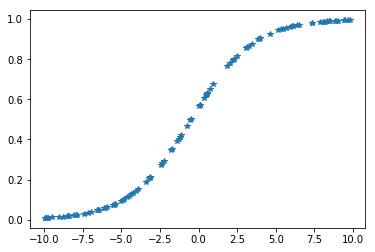

In [10]:
w_unknown=0.5
b_unknown=0.25
X= np.random.random(100)*20 -10
Y=sigmoid(X,w_unknown,b_unknown)
plt.plot(X,Y,"*")
plt.show()

In [11]:
def calculate_loss(X,Y,w_estimate,b_estimate):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_estimate,b_estimate))**2
    return loss

In [12]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB= np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [13]:
import sys

In [14]:
minLoss = sys.maxsize
minI = 0
minJ = 0
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X, Y, WW[i,j], BB[i,j])
    if(minLoss > Loss[i,j]):
      minLoss = Loss[i,j]
      minI = i
      minJ = j

Text(0.5, 0, 'Loss')

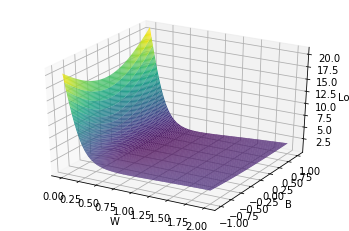

In [15]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

In [16]:
ij = np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j = ij- i*Loss.shape[1]

# Sigmoid Neuron Class

In [17]:
!pip3 install tqdm

In [18]:
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook

In [19]:
class SigmoidNeuron:
    def __init__(self):
        w=None
        b=None
    def preceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.preceptron(x))
        return (y_pred- y)* y_pred *(1-y_pred) *x
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.preceptron(x))
        return (y_pred- y)* y_pred *(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate = 1 ,initialise=True,display_loss=False):
        if initialise:
            np.random.seed(1)
            self.w = np.random.randn(1,X.shape[1])
            self.b=0
        if display_loss:
            loss=[]
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw,db=0,0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-= learning_rate *dw
            self.b -=learning_rate * db
            if display_loss:
                Y_pred = self.sigmoid(self.preceptron(X))
                loss.append(mean_squared_error(Y_pred,Y))
        if display_loss:
            plt.plot(loss)
            plt.xlabel("Epochs")
            plt.ylabel("Mean Square Error")
            plt.show()
    def predict(self,X):
        Y_pred=[]
        for x in X:
            y_pred = self.sigmoid(self.preceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)
            

# Fit For Toy Data

In [20]:
X= np.array([[2.5,2.5],[4,-1],[1,-4],[-2,-4],[-3,1.25],[1,5]])
Y=np.array([1,1,1,0,0,0])
sg = SigmoidNeuron()
sg.fit(X,Y)
print(sg.w, sg.b)



[[ 1.73973527 -0.48499799]] [-0.09080372]



[[ 1.71088779 -0.5166876 ]] [-0.06810279]


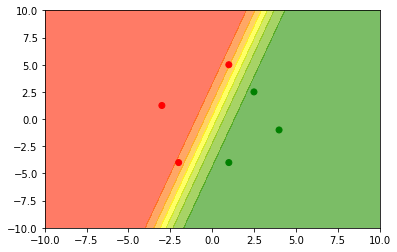


[[ 1.71905693 -0.63515832]] [-0.1311275]


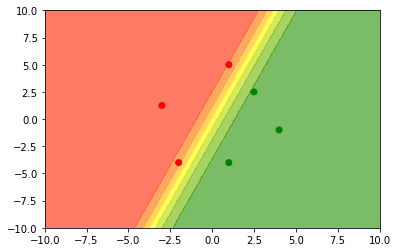


[[ 1.78662892 -0.5636177 ]] [-0.18372636]


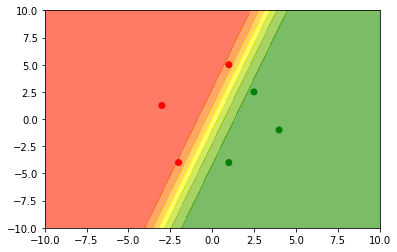


[[ 1.80241331 -0.62985632]] [-0.23199261]


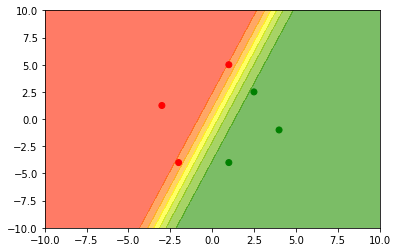


[[ 1.84422222 -0.60894637]] [-0.27357666]


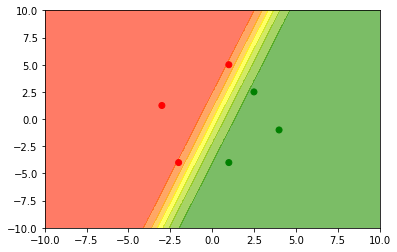


[[ 1.86821174 -0.63160333]] [-0.3119064]


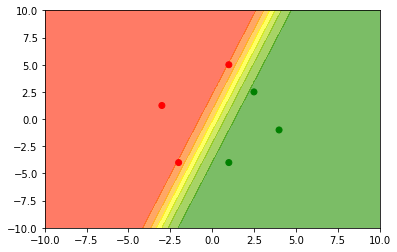


[[ 1.89641263 -0.63514593]] [-0.34662097]


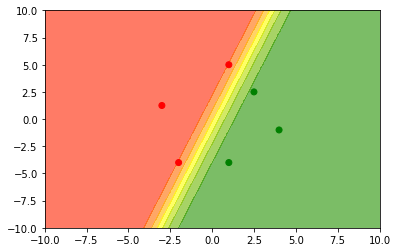


[[ 1.9206954  -0.64433276]] [-0.37870035]


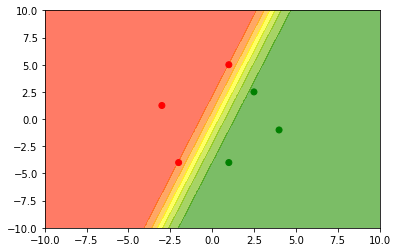


[[ 1.94397895 -0.65141265]] [-0.40836046]


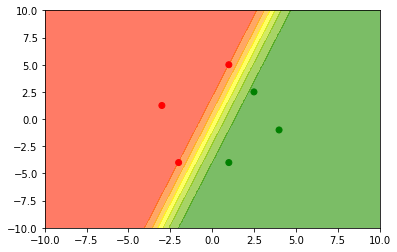


[[ 1.96578894 -0.65836741]] [-0.43594032]


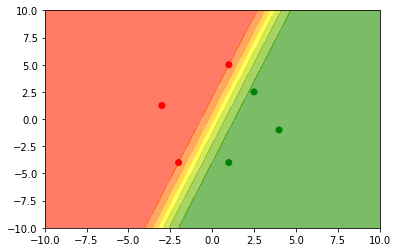


[[ 1.98640185 -0.66489363]] [-0.46168049]


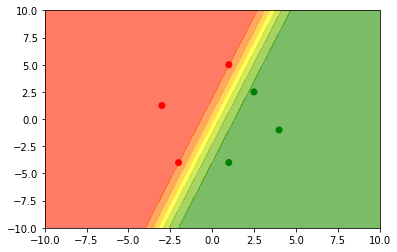


[[ 2.00593278 -0.67107745]] [-0.48579017]


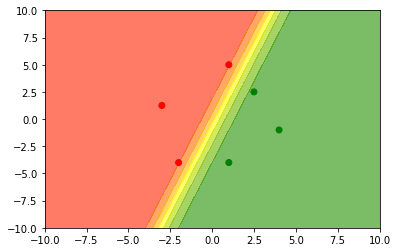


[[ 2.02449351 -0.67695104]] [-0.50844551]


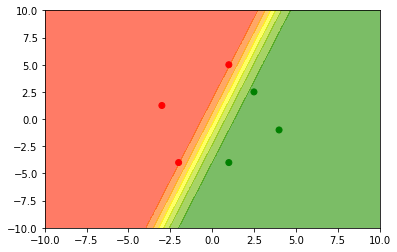


[[ 2.04217864 -0.68254483]] [-0.52979679]


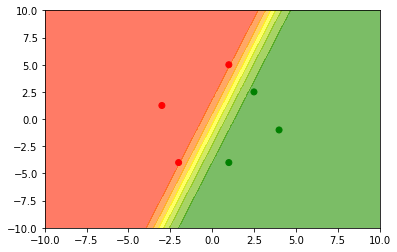


[[ 2.0590697  -0.68788496]] [-0.54997306]


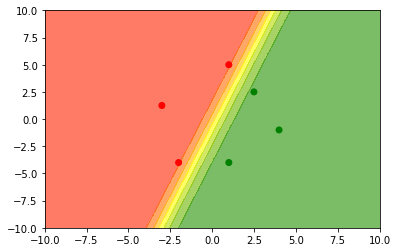


[[ 2.07523737 -0.69299414]] [-0.56908586]


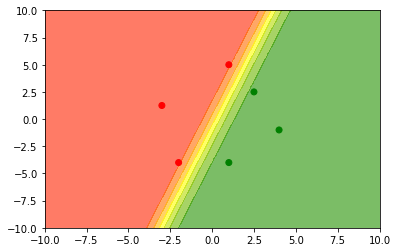


[[ 2.0907433  -0.69789217]] [-0.58723218]


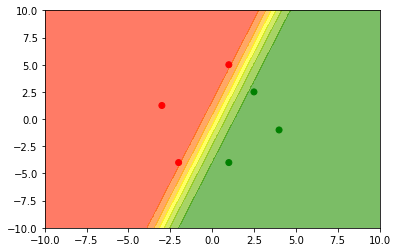


[[ 2.1056416  -0.70259642]] [-0.60449681]


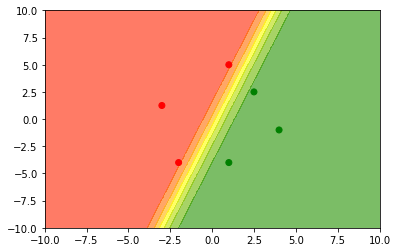


[[ 2.11997996 -0.70712222]] [-0.62095428]


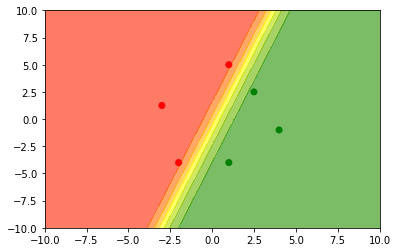


[[ 2.13380068 -0.71148316]] [-0.6366704]


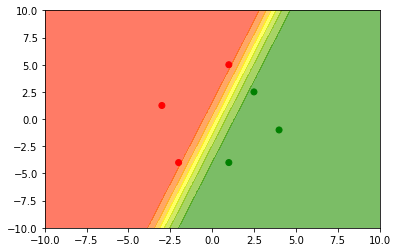

In [21]:
def plot_sig(X,Y,sn):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.array([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.preceptron(val))
    plt.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    plt.show()
sg.fit(X,Y,1,0.75,True)
for i in range(20):
    print(sg.w,sg.b)
    plot_sig(X,Y,sg)
    sg.fit(X,Y,1,0.75,False)


[[ 1.71088779 -0.5166876 ]] [-0.06810279]



[[ 1.71905693 -0.63515832]] [-0.1311275]



[[ 1.78662892 -0.5636177 ]] [-0.18372636]



[[ 1.80241331 -0.62985632]] [-0.23199261]



[[ 1.84422222 -0.60894637]] [-0.27357666]



[[ 1.86821174 -0.63160333]] [-0.3119064]



[[ 1.89641263 -0.63514593]] [-0.34662097]



[[ 1.9206954  -0.64433276]] [-0.37870035]



[[ 1.94397895 -0.65141265]] [-0.40836046]



[[ 1.96578894 -0.65836741]] [-0.43594032]



[[ 1.98640185 -0.66489363]] [-0.46168049]



[[ 2.00593278 -0.67107745]] [-0.48579017]



[[ 2.02449351 -0.67695104]] [-0.50844551]



[[ 2.04217864 -0.68254483]] [-0.52979679]



[[ 2.0590697  -0.68788496]] [-0.54997306]



[[ 2.07523737 -0.69299414]] [-0.56908586]



[[ 2.0907433  -0.69789217]] [-0.58723218]



[[ 2.1056416  -0.70259642]] [-0.60449681]



[[ 2.11997996 -0.70712222]] [-0.62095428]



[[ 2.13380068 -0.71148316]] [-0.6366704]


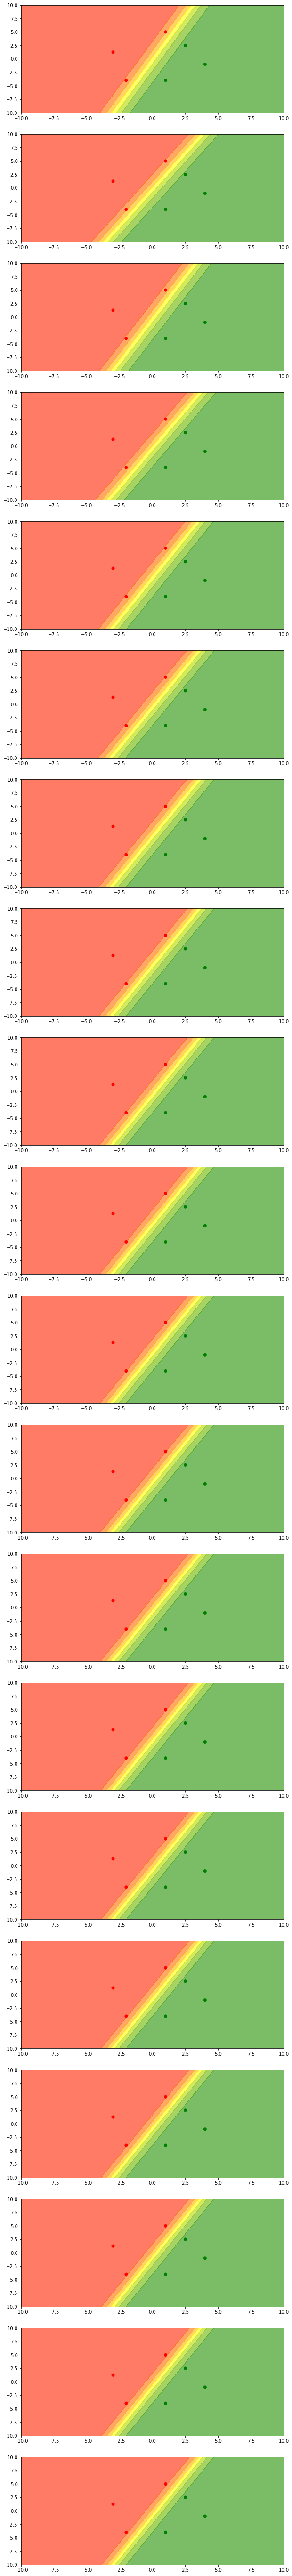

In [22]:

def plot_sig(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.array([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.preceptron(val))
    ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    ax.plot()
    
sg.fit(X,Y,1,0.75,True)
N=20
plt.figure(figsize=(10,N*5))
for i in range(N):
    print(sg.w,sg.b)
    ax = plt.subplot(N,1,i+1)
    plot_sig(X,Y,sg,ax)
    sg.fit(X,Y,1,0.75,False)

# Sigmoid On Practical Example

In [23]:
clean_data_path = "./input/mobile_cleaned.csv"
import pandas as pd

In [24]:
data = pd.read_csv(clean_data_path)
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [25]:
Threshold=4.1
data['Class']=(data['Rating']>Threshold).astype(np.int)

In [26]:
X = data.drop(["PhoneId","Rating","Class"],axis=1)
Y=data['Rating']
Y_bin=data["Class"]

In [27]:
XN=X.values
YN=Y.values
YN_bin=Y_bin.values

In [28]:
Y_bin.value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test ,Y_train,Y_test=train_test_split(XN,YN, random_state=1,stratify=YN_bin)

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
scalar = StandardScaler()

In [33]:
X_scaled_train = scalar.fit_transform(X_train)
X_scaled_test=scalar.transform(X_test)

In [34]:
scalar_op=MinMaxScaler()

In [35]:
Y_scaled_train= scalar_op.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test =scalar_op.transform(Y_test.reshape(-1,1))

In [36]:
scaled_threshold=(scalar_op.transform(np.array(Threshold).reshape(-1,1)))

In [37]:
scaled_threshold[0][0]

0.6399999999999999

In [38]:
Y_bin_train = (Y_scaled_train>scaled_threshold).astype(np.int)

In [39]:
Y_bin_test=(Y_scaled_test>scaled_threshold).astype(np.int)

In [40]:
sn = SigmoidNeuron()

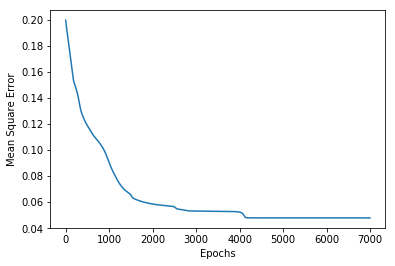

In [73]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=7000,learning_rate=0.002,display_loss=True)

In [74]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [75]:
Y_pred_binrised_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()
Y_pred_binrised_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()

In [76]:
accuracy_train = accuracy_score(Y_pred_binrised_train,Y_bin_train)
accuracy_test = accuracy_score(Y_pred_binrised_test,Y_bin_test)

In [77]:
print(accuracy_train,accuracy_test)

0.8235294117647058 0.7790697674418605
